In [8]:
# !pip install turingquant
# !pip install scipy
# !pip install seaborn

In [9]:
from turingquant.metrics import returns
from turingquant.metrics import cumulative_returns
from turingquant.metrics import cagr
from turingquant.metrics import mar_ratio
import yfinance as yf
import seaborn as sns

# Lista de Funções para Estudar

* [returns]()
* cumulative_returns 
* [cagr](https://www.suno.com.br/artigos/cagr/) 
* [mar_ratio](https://www.investopedia.com/terms/m/mar-ratio.asp)

Para cada uma das funções:
1. Estudar conceitos por trás
2. Testar função com dados da Yahoo Finance
3. Explicar resultados e fórmulas utilizadas

In [25]:
df = yf.download(["ITUB3.SA","PETR3.SA"], start='2020-01-01')

[*********************100%***********************]  2 of 2 completed


In [24]:
df

Adj Close                 Close                  High             \
             ITUB3.SA   PETR3.SA   ITUB3.SA   PETR3.SA   ITUB3.SA   PETR3.SA   
Date                                                                           
2016-01-04   9.717204   3.663706  14.000000   8.670000  14.769696   8.960000   
2016-01-05   9.923329   3.570740  14.296969   8.450000  14.327272   8.890000   
2016-01-06   9.864435   3.405936  14.212121   8.060000  14.406060   8.250000   
2016-01-07   9.746654   3.308744  14.042424   7.830000  14.151515   8.070000   
2016-01-08   9.898085   3.321422  14.260606   7.860000  14.260606   8.040000   
...               ...        ...        ...        ...        ...        ...   
2023-05-24  22.420000  29.770000  22.420000  29.770000  22.620001  29.940001   
2023-05-25  23.049999  29.549999  23.049999  29.549999  23.190001  29.990000   
2023-05-26  22.940001  30.040001  22.940001  30.040001  23.480000  30.049999   
2023-05-29  22.750000  29.850000  22.750000  29.850000  22.959999  30.040001   
2023-05-30  22.639999  29.570000  22.639999  29.570000   0.000000   0.000000   

                  Low                  Open              Volume            
             ITUB3.SA   PETR3.SA   ITUB3.SA   PETR3.SA ITUB3.SA  PETR3.SA  
Date                                                                       
2016-01-04  14.000000   8.310000  14.769696   8.310000   278520  16912500  
2016-01-05  14.042424   8.350000  14.212121   8.730000    99825   9146500  
2016-01-06  13.939393   8.060000  14.236363   8.220000   181995   9908400  
2016-01-07  13.903030   7.650000  14.036363   7.720000   221925  10777500  
2016-01-08  13.963636   7.680000  14.175757   8.000000   122100  10759800  
...               ...        ...        ...        ...      ...       ...  
2023-05-24  22.299999  29.209999  22.370001  29.299999   358300   7177400  
2023-05-25  22.559999  29.320000  22.639999  29.990000   738800  10559200  
2023-05-26  22.750000  29.580000  23.170000  29.879999   480300   9729700  
2023-05-29  22.700001  29.610001  22.850000  29.879999   447000   3604000  
2023-05-30   0.000000   0.000000   0.000000   0.000000        0         0  

[1844 rows x 12 columns]

## Função _returns_

Calcula a variação percentual de um ativo, dia a dia. Abaixo, exemplos de sua utilização.

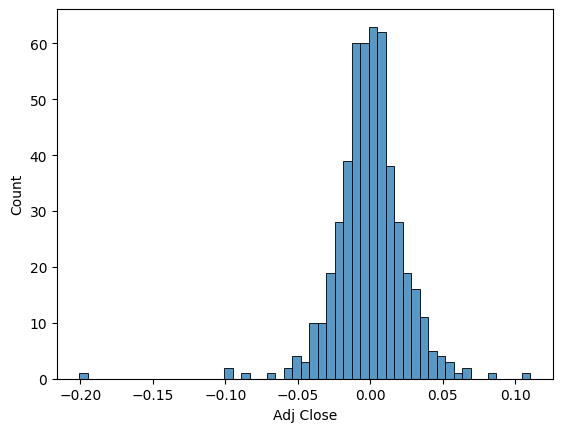

In [12]:
# get just the adjusted close price of days 01/01/2020 and 01/01/2022
# df['Adj Close'].loc['2020-01-01':'2022-01-01']
# get just the initial and final price
data = returns(df['Adj Close'].loc['2020-01-01':'2022-01-01'])
sns.histplot(data);

- seria mais interessante automatizar

### Comparar este histograma com periodos mais curtos ou periodos onde a acao tenha ido melhor

In [13]:
# retornos diarios
returns(df['Adj Close'].loc['2020-01-01':'2022-01-01'])

Date
2020-01-02         NaN
2020-01-03   -0.008282
2020-01-06   -0.010208
2020-01-07   -0.019375
2020-01-08   -0.010198
                ...   
2021-12-23    0.004169
2021-12-27    0.009341
2021-12-28   -0.003599
2021-12-29   -0.003096
2021-12-30   -0.011905
Name: Adj Close, Length: 495, dtype: float64

<Axes: xlabel='Adj Close', ylabel='Count'>

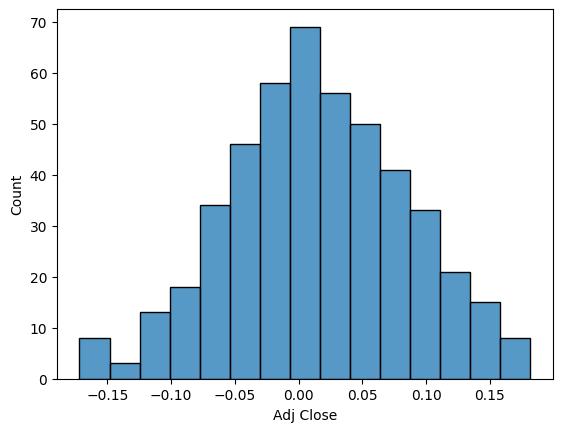

In [14]:
# histograma de retorno mensal
monthly_data = df['Adj Close'].loc['2018-01-01':'2020-01-01'].pct_change(periods=21)
sns.histplot(monthly_data)

### Qual foi a comparacao do histograma de retorno mensal com o histograma de retorno diario?

In [11]:

df['Adj Close'].loc['2018-01-01':'2022-01-01'].pct_change(periods=21)

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
                ...   
2021-12-23   -0.066008
2021-12-27   -0.065430
2021-12-28   -0.047297
2021-12-29   -0.046500
2021-12-30   -0.049414
Name: Adj Close, Length: 989, dtype: float64

Podemos ver que o retorno do ativo ITUB3.SA foi de -37,43% nos anos de 2020 - 2022. Agora podemos utilizar esta metrica para calcular outros indicadores quantitativos

## Função _cumulative\_returns_

**Representa o retorno cumulativo de determinado ativo (ou portfolio) em um dado período.** <br><br>

O retorno cumulativo é bastante útil para avaliar o desempenho geral de um investimento no horizonte de tempo determinado, sendo possível observar também as flutuações na cotação desse ativo ou portfolio<br><br>

Sua fórmula é dada por: 
$Ret_{acum} = (1 + Ret_{t_{1}}) * (1 + Ret_{t_{2}}) * ... * (1 + Ret_{t_{n}})$





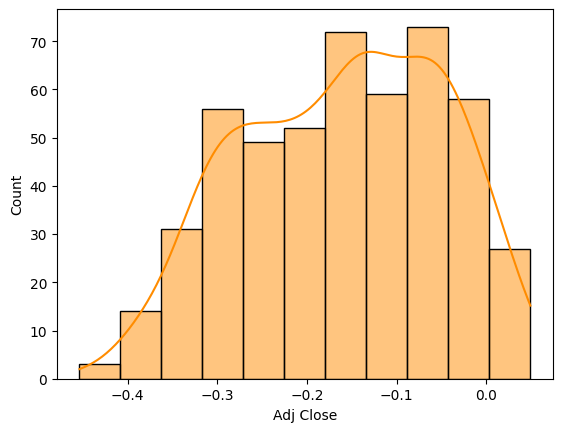

In [17]:
# retorno logaritmo
data_log = cumulative_returns(returns(df['Adj Close'].loc['2020-01-01':'2022-01-01']), 'log')   
sns.histplot(data_log, 
             color = "darkorange",
             kde = True);

<Axes: xlabel='Date', ylabel='Adj Close'>

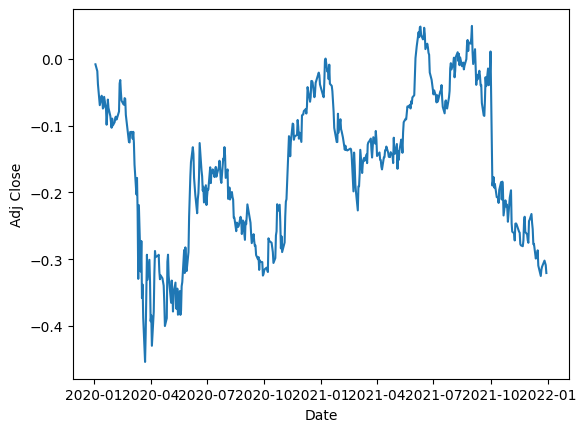

In [22]:
# line plot fica mais simples de visualizar
sns.lineplot(data_log)

e o retorno somado, a evoluca

tem dois tipos:
- na pratica talvez seja mais usado o simples
- o log pode ajudar em alguns

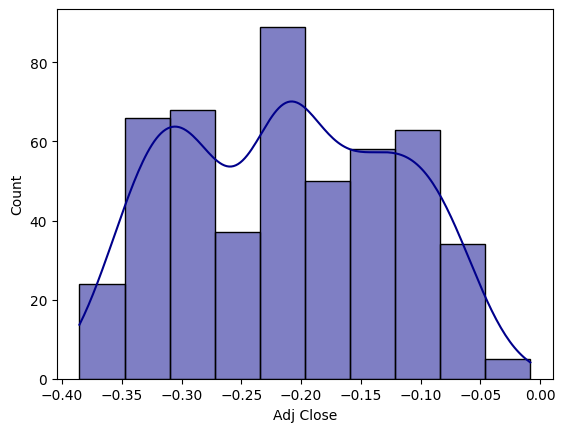

In [18]:
# retorno simples 
data_simp = cumulative_returns(returns(df['Adj Close'].loc['2020-01-01':'2022-01-01']), 'simp')   
sns.histplot(data_simp, 
             color = "darkblue",
             kde = True);

log retorno pode ser interessante, e a soma dos retornos: quando tem uma queda para voltar para o mesmo patamar e o mesmo valor

## Função _cagr_

**CAGR é a sigla para Compound Annual Growth Rate, ou seja, Taxa de Crescimento Anual Composta** <br><br>

Geralmente apresentada em termos percentuais, nada mais é do que a taxa de crescimento anual que, se aplicada de forma constante ao longo do período considerado, resultaria no crescimento total observado na cotação de um ativo (ou portfolio). É bastante útil para comparar a performance de investimentos em diferentes horizontes de tempo, pois utiliza a mesma base de tempo (anual). Cabe ressaltar que o CAGR não mostra explicitamente a variação existente na cotação (o quanto flutuou o preço do ativo). Um CAGR de 10%, por exemplo, pode "esconder" momentos de retornos negativos e momentos de retorno muito positivos

In [33]:
# CAGR anual - time_scale de 252 dias
# 2020 a 2021

cagr_anual_20_21 = cagr(returns(df['Adj Close'].loc['2020-01-01':'2021-01-01']), time_scale = 252)
print(cagr_anual_20_21)

-0.12119868040964366


In [34]:
# CAGR anual - time_scale de 252 dias
# 2021 a 2022

cagr_anual_21_22 = cagr(returns(df['Adj Close'].loc['2021-01-01':'2022-01-01']), time_scale = 252)
print(cagr_anual_21_22)

-0.2822477819612216


se o ativo oscilasse um valor fixo: 

- cagr vai ser a porcentagem media q o investimento rendeu por ano
- quando roda um backtesting cagr e uma metrica interessante de se analizar

### Um grafico melhoraria a explicacao desta metrica ???

### Seria interessante comparar esta metrica aplicada em algum outro ativo e fazer alguma comparacao ???

## Função _mar\_ratio_

**MAR Ratio é a sigla para Minimum Acceptable Return Ratio, ou seja, Taxa de Retorno Mínimo Aceitável** <br><br>

O seu cálculo leva em consideração duas coisas: 1) CAGR (explicado acima) e 2) Drawdown <br>
O Drawdown representa o quanto a cotação de um ativo (ou portfolio) caiu do o seu pico anteriormente alcançado até seu vale subsequente. O Máximo Drawdown representa a maior queda (em termos percentuais) de um pico até seu vale subsequente, mostrando o impacto negativo que um investidor teria tido se tivesse comprado o ativo no pior pico possível e vendido no ponto mais baixo do Drawdown. <br><br>

Finalmente, o MAR ratio pode ser expresso pela razão entre o CAGR e o Máximo Drawdown observados no período. É, portanto, uma medida de avaliação da relação risco-retorno, funcionando como uma métrica para ajustar o retorno de um investimento ao risco a que ele está exposto (tomando como base seu desempenho histórico).

In [41]:
# MAR Ratio para 2 anos (2020 - 2022)
# time_window = 2; time_scale = 252

marratio_20_22 = mar_ratio(returns(df['Adj Close'].loc['2020-01-01':'2022-01-01']), time_window = 2, time_scale = 252)
print(marratio_20_22)

-0.004302659016234036


In [42]:
# MAR Ratio para 1 ano (2020 - 2021)
# time_window = 1; time_scale = 252

marratio_20_21 = mar_ratio(returns(df['Adj Close'].loc['2020-01-01':'2021-01-01']), time_window = 1, time_scale = 252)
print(marratio_20_21)

-0.0010287887929512508


In [43]:
# MAR Ratio para 1 ano (2021 - 2022)
# time_window = 1; time_scale = 252

marratio_21_22 = mar_ratio(returns(df['Adj Close'].loc['2021-01-01':'2022-01-01']), time_window = 1, time_scale = 252)
print(marratio_21_22)

-0.00801542557792216


- o maximo de retorno q estamos tendo considerando o risco

mar ratio ja usa o cagr:

- comparar o mar ratio () de 2 acoes e do drawdown e do preco do ativo: automatizar !!!!

- acrescentar garman class

- grafios garman class, preco e drawdown

- input: janela de tempo, codigos dos ativos

# Como essas funções podem ser utilizadas para montar um portfolio de investimento?